# 3.10 変数変換

In [1]:
import pandas as pd
import numpy as np
from scipy import special
import seaborn as sns
import warnings

sns.set_theme()
warnings.simplefilter("ignore")

## a

$$
\begin{cases}
p_{\theta}(\theta) = \frac{1}{B(a, b)} \theta^{a - 1} (1 - \theta)^{b - 1} \\
\psi = g(\theta) = \log \left(\frac{\theta}{1-\theta}\right) = \text{logit}(\theta) \\
h(\psi) = g^{-1}(\theta(\psi)) = \frac{1}{1 + e^{-\psi}}
\end{cases}
$$

ヤコビアンを計算する

$$
\begin{aligned}
\frac{dh}{d\psi} 
&=\frac{
    e^{-\psi}
}{
    (1 + e^{-\psi})^2
} \\
&=\frac{
    1
}{
    (1 + e^{-\psi})
    (1 + e^{\psi})
}
\end{aligned}
$$

$p_{\psi}$ を計算する。

$$
\begin{aligned}
p_{\psi}(\psi)
&= p_{\theta}(\theta) \times \left | 
\frac{dh}{d\psi} 
\right| \\
&=
\frac{1}{B(a, b)} \theta^{a - 1} (1 - \theta)^{b - 1}
\times
\frac{
    1
}{
    (1 + e^{-\psi})
    (1 + e^{\psi})
}
\\
&=
\frac{1}{B(a, b)} (1 + e^{-\psi})^{1 - a}  (1 + e^{\psi})^{1 - b} 
\times
\frac{
    1
}{
    (1 + e^{-\psi})
    (1 + e^{\psi})
}
\\
&=
\frac{
(1 + e^{-\psi})^{- a}  (1 + e^{\psi})^{- b} }{B(a, b)} 
\\
&=
\frac{1}{B(a, b)} \frac{e^{-b\psi}}{(1 + e^{-\psi})^{a + b}}
\end{aligned}
$$

これは[一般化ロジスティック分布](https://en.wikipedia.org/wiki/Generalized_logistic_distribution)である。

In [2]:
def pdf_generalized_logistic(x, a, b):
    assert a > 0
    assert b > 0

    return (1 / special.beta(a, b)) * (np.exp(-b * x)) / (1 + np.exp(-x)) ** (a + b)

In [3]:
a, b = 1, 1
psi = np.linspace(-10, 10, 100)

df_a = pd.DataFrame()
df_a["psi"] = psi
df_a["proba"] = pdf_generalized_logistic(psi, a, b)

df_a.head()

,psi,proba
0,-10.000000,0.000045
1,-9.797980,0.000056
2,-9.595960,0.000068
3,-9.393939,0.000083
4,-9.191919,0.000102


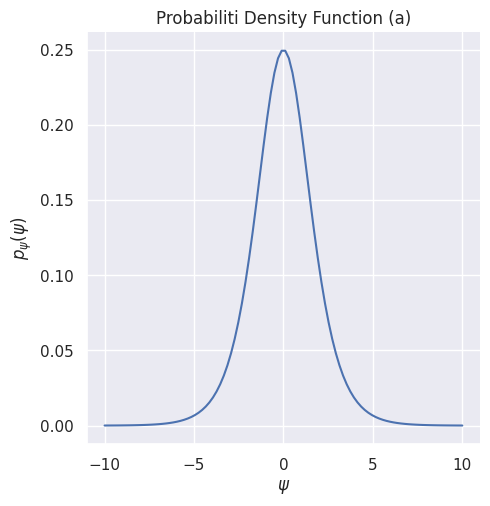

In [4]:
_ = sns.relplot(
    df_a,
    x="psi",
    y="proba",
    kind="line",
).set(
    xlabel="$\psi$", ylabel="$p_{\psi}(\psi)$", title="Probabiliti Density Function (a)"
)

## b

$$
\begin{cases}
p_{\theta}(\theta) = \frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b\theta} \\
\psi = g(\theta) = \log \theta \\
h(\psi) = g^{-1}(\theta(\psi)) = e^{\psi}
\end{cases}
$$

ヤコビアンを計算する

$$
\frac{dh}{d\psi} 
=
e^{\psi}
$$

$p_{\psi}$ を計算する。

$$
\begin{aligned}
p_{\psi}(\psi)
&=
\frac{b^a}{\Gamma(a)} \theta^{a-1} e^{-b\theta} 
\times 
e^{\psi}
\\
&=
\frac{b^a}{\Gamma(a)} e^{\psi(a-1)} e^{-be^\psi} 
\times 
e^{\psi}
\\
&=
\frac{b^a}{\Gamma(a)} e^{a\psi} e^{-be^\psi} 
\end{aligned}
$$

これは[Log-Gamma分布](https://www.math.wm.edu/~leemis/chart/UDR/PDFs/Loggamma.pdf)である。

In [5]:
def pdf_log_gamma(x, a, b):
    assert a > 0
    assert b > 0

    return (b**a / special.gamma(a)) * np.exp(a * x) * np.exp(-b * np.exp(x))

In [6]:
a, b = 1, 1
psi = np.linspace(-10, 10, 100)

df_b = pd.DataFrame()
df_b["psi"] = psi
df_b["proba"] = pdf_log_gamma(psi, a, b)

df_b.head()

,psi,proba
0,-10.000000,0.000045
1,-9.797980,0.000056
2,-9.595960,0.000068
3,-9.393939,0.000083
4,-9.191919,0.000102


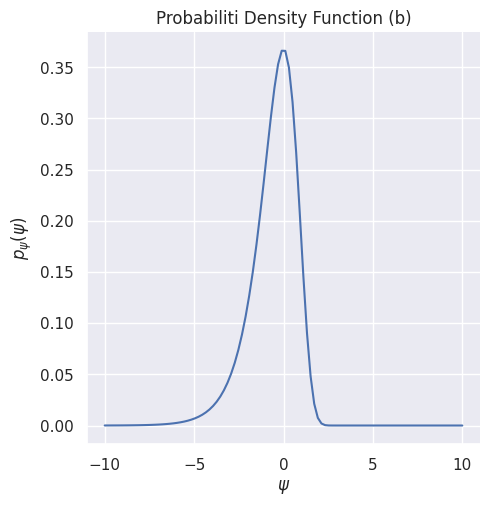

In [7]:
_ = sns.relplot(
    df_b,
    x="psi",
    y="proba",
    kind="line",
).set(
    xlabel="$\psi$", ylabel="$p_{\psi}(\psi)$", title="Probabiliti Density Function (b)"
)